<a href="https://colab.research.google.com/github/AartiKularni/Data-Science-/blob/main/Exp2_Logistic_Regression_(Binary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   StudyHours  Attendance  Pass
0    5.993428   60.846293     0
1    4.723471   70.793547     0
2    6.295377   71.572855     0
3    8.046060   66.977227     0
4    4.531693   73.387143     0

Model Evaluation:
Accuracy  : 0.95
Precision : 1.00
Recall    : 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



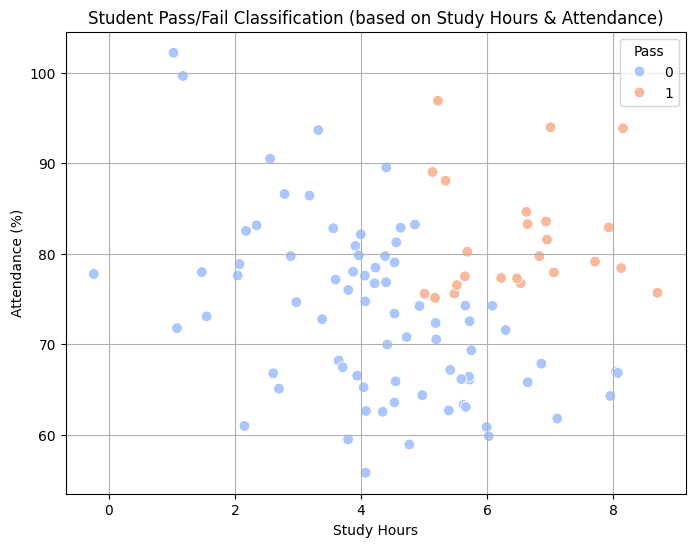

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic dataset
# Features: Study Hours, Attendance
# Target: Pass (1) or Fail (0)
np.random.seed(42)
n_students = 100

study_hours = np.random.normal(5, 2, n_students)       # mean=5 hrs, std=2
attendance = np.random.normal(75, 10, n_students)      # mean=75%, std=10

# Ground truth: students with more than 5 study hours and >75% attendance likely pass
pass_fail = (study_hours > 5) & (attendance > 75)
pass_fail = pass_fail.astype(int)

# Create DataFrame
data = pd.DataFrame({
    'StudyHours': study_hours,
    'Attendance': attendance,
    'Pass': pass_fail
})

# Optional: View first few rows
print(data.head())

# Step 2: Split data into train and test
X = data[['StudyHours', 'Attendance']]
y = data['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = model.predict(X_test)

# Step 5: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")

# Optional: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='StudyHours', y='Attendance', hue='Pass', data=data, palette='coolwarm', s=60)
plt.title("Student Pass/Fail Classification (based on Study Hours & Attendance)")
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.grid(True)
plt.show()